In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
# Dowanlod the dataset
!gdown 1q_oGHpqPUoRdjKcCcRAsmioFdw4q-onw

Downloading...
From: https://drive.google.com/uc?id=1q_oGHpqPUoRdjKcCcRAsmioFdw4q-onw
To: /content/Jamboree.csv
100% 16.2k/16.2k [00:00<00:00, 30.9MB/s]


# Defining Problem

We need to understand what factors are important in graduate admissions and how these factors are interrelated among themselves. Also, we need to predict one's chances of admission given the rest of the variables.

In [ ]:
# read and view data
df=pd.read_csv("Jamboree.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# no. of rows and columns
df.shape

(500, 9)

There are 500 rows and 9 columns in the dataset.

In [ ]:
# basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# statistical details
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no null values in the data.

In [ ]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
duplicated_rows=df[df.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit ]
Index: []


University rating, SOP, LOR and Research seems to be a categorical variable as they have less number of unique values. GRE score, TOEFL score and CGPA are numerical variables. Chance to  admit column is the target column for us.

In [ ]:
df.drop(['Serial No.'],axis=1,inplace=True)

Need to remove the unwanted column from the data.

# EDA & Visual Analysis

In [ ]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<Axes: >

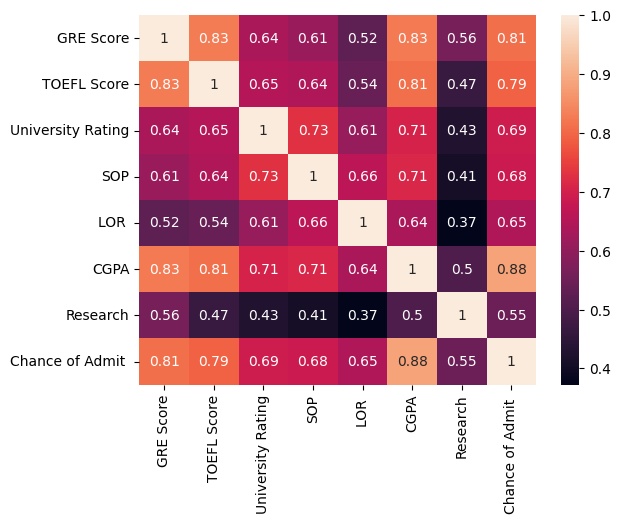

In [ ]:
sns.heatmap(df.corr(),annot=True)

Here we can observe that GRE score, TOEFL score and CGPA are highly positively correlated to the chance of getting the admission where as other attributes like university rating, SOP, LOR and research are weakly correlated.

<Axes: >

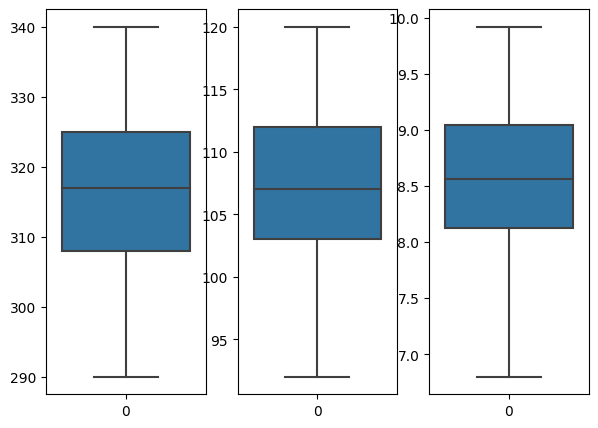

In [ ]:
# Outliers Detection

plt.figure(figsize=(7,5))
plt.subplot(1,3,1)
sns.boxplot(df['GRE Score'])

plt.subplot(1,3,2)
sns.boxplot(df['TOEFL Score'])

plt.subplot(1,3,3)
sns.boxplot(df['CGPA'])

There are no outliers in the data

<Axes: xlabel='CGPA', ylabel='Count'>

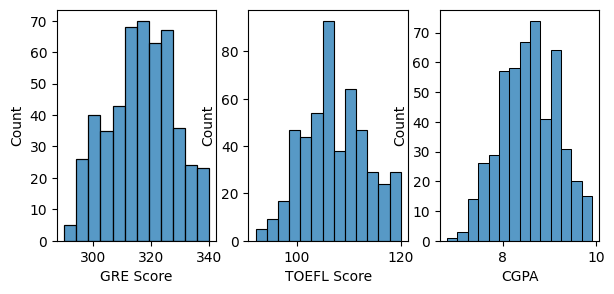

In [ ]:
# Distribution of variables
plt.figure(figsize=(7,3))
plt.subplot(1,3,1)
sns.histplot(df['GRE Score'])

plt.subplot(1,3,2)
sns.histplot(df['TOEFL Score'])

plt.subplot(1,3,3)
sns.histplot(df['CGPA'])

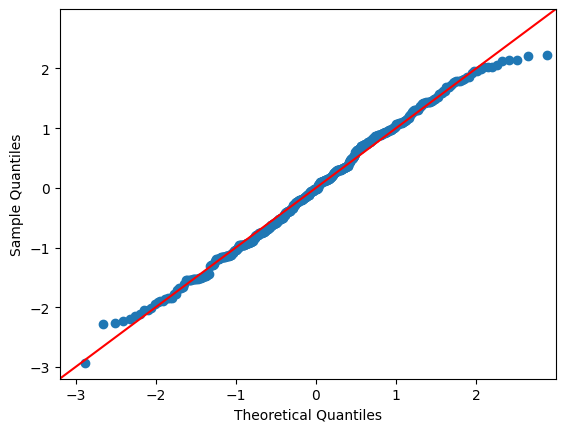

<Figure size 300x300 with 0 Axes>

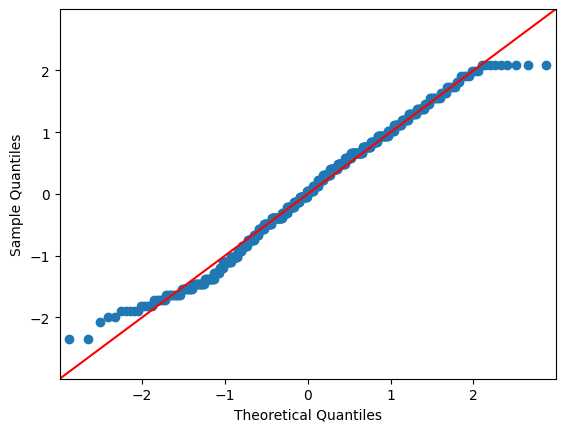

<Figure size 300x300 with 0 Axes>

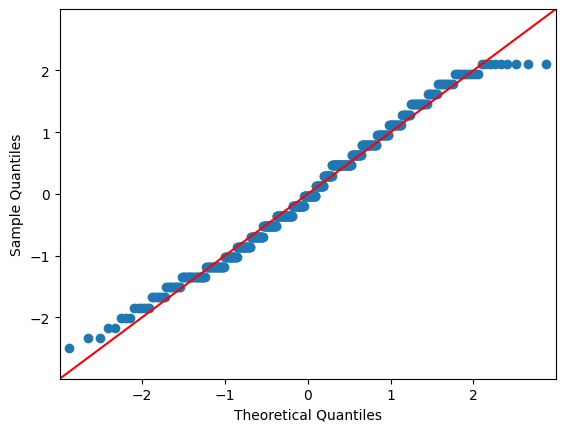

<Figure size 300x300 with 0 Axes>

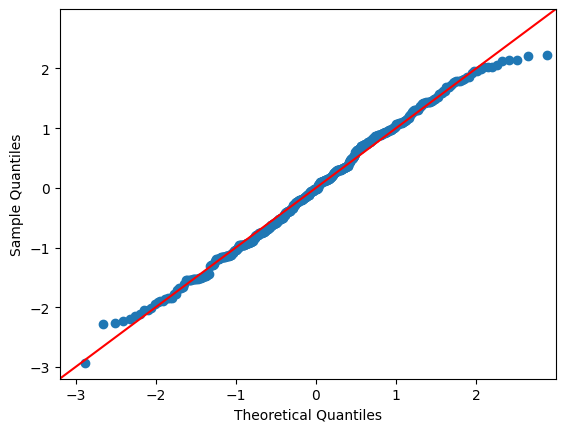

In [ ]:
plt.figure(figsize=(3,3))
sm.qqplot(df['GRE Score'],fit=True,line='45')
plt.figure(figsize=(3,3))
sm.qqplot(df['TOEFL Score'],fit=True,line='45')
plt.figure(figsize=(3,3))
sm.qqplot(df['CGPA'],fit=True,line='45')

Numerical varibles seems to be normally distributed as we can see in the histplot and qq plot.

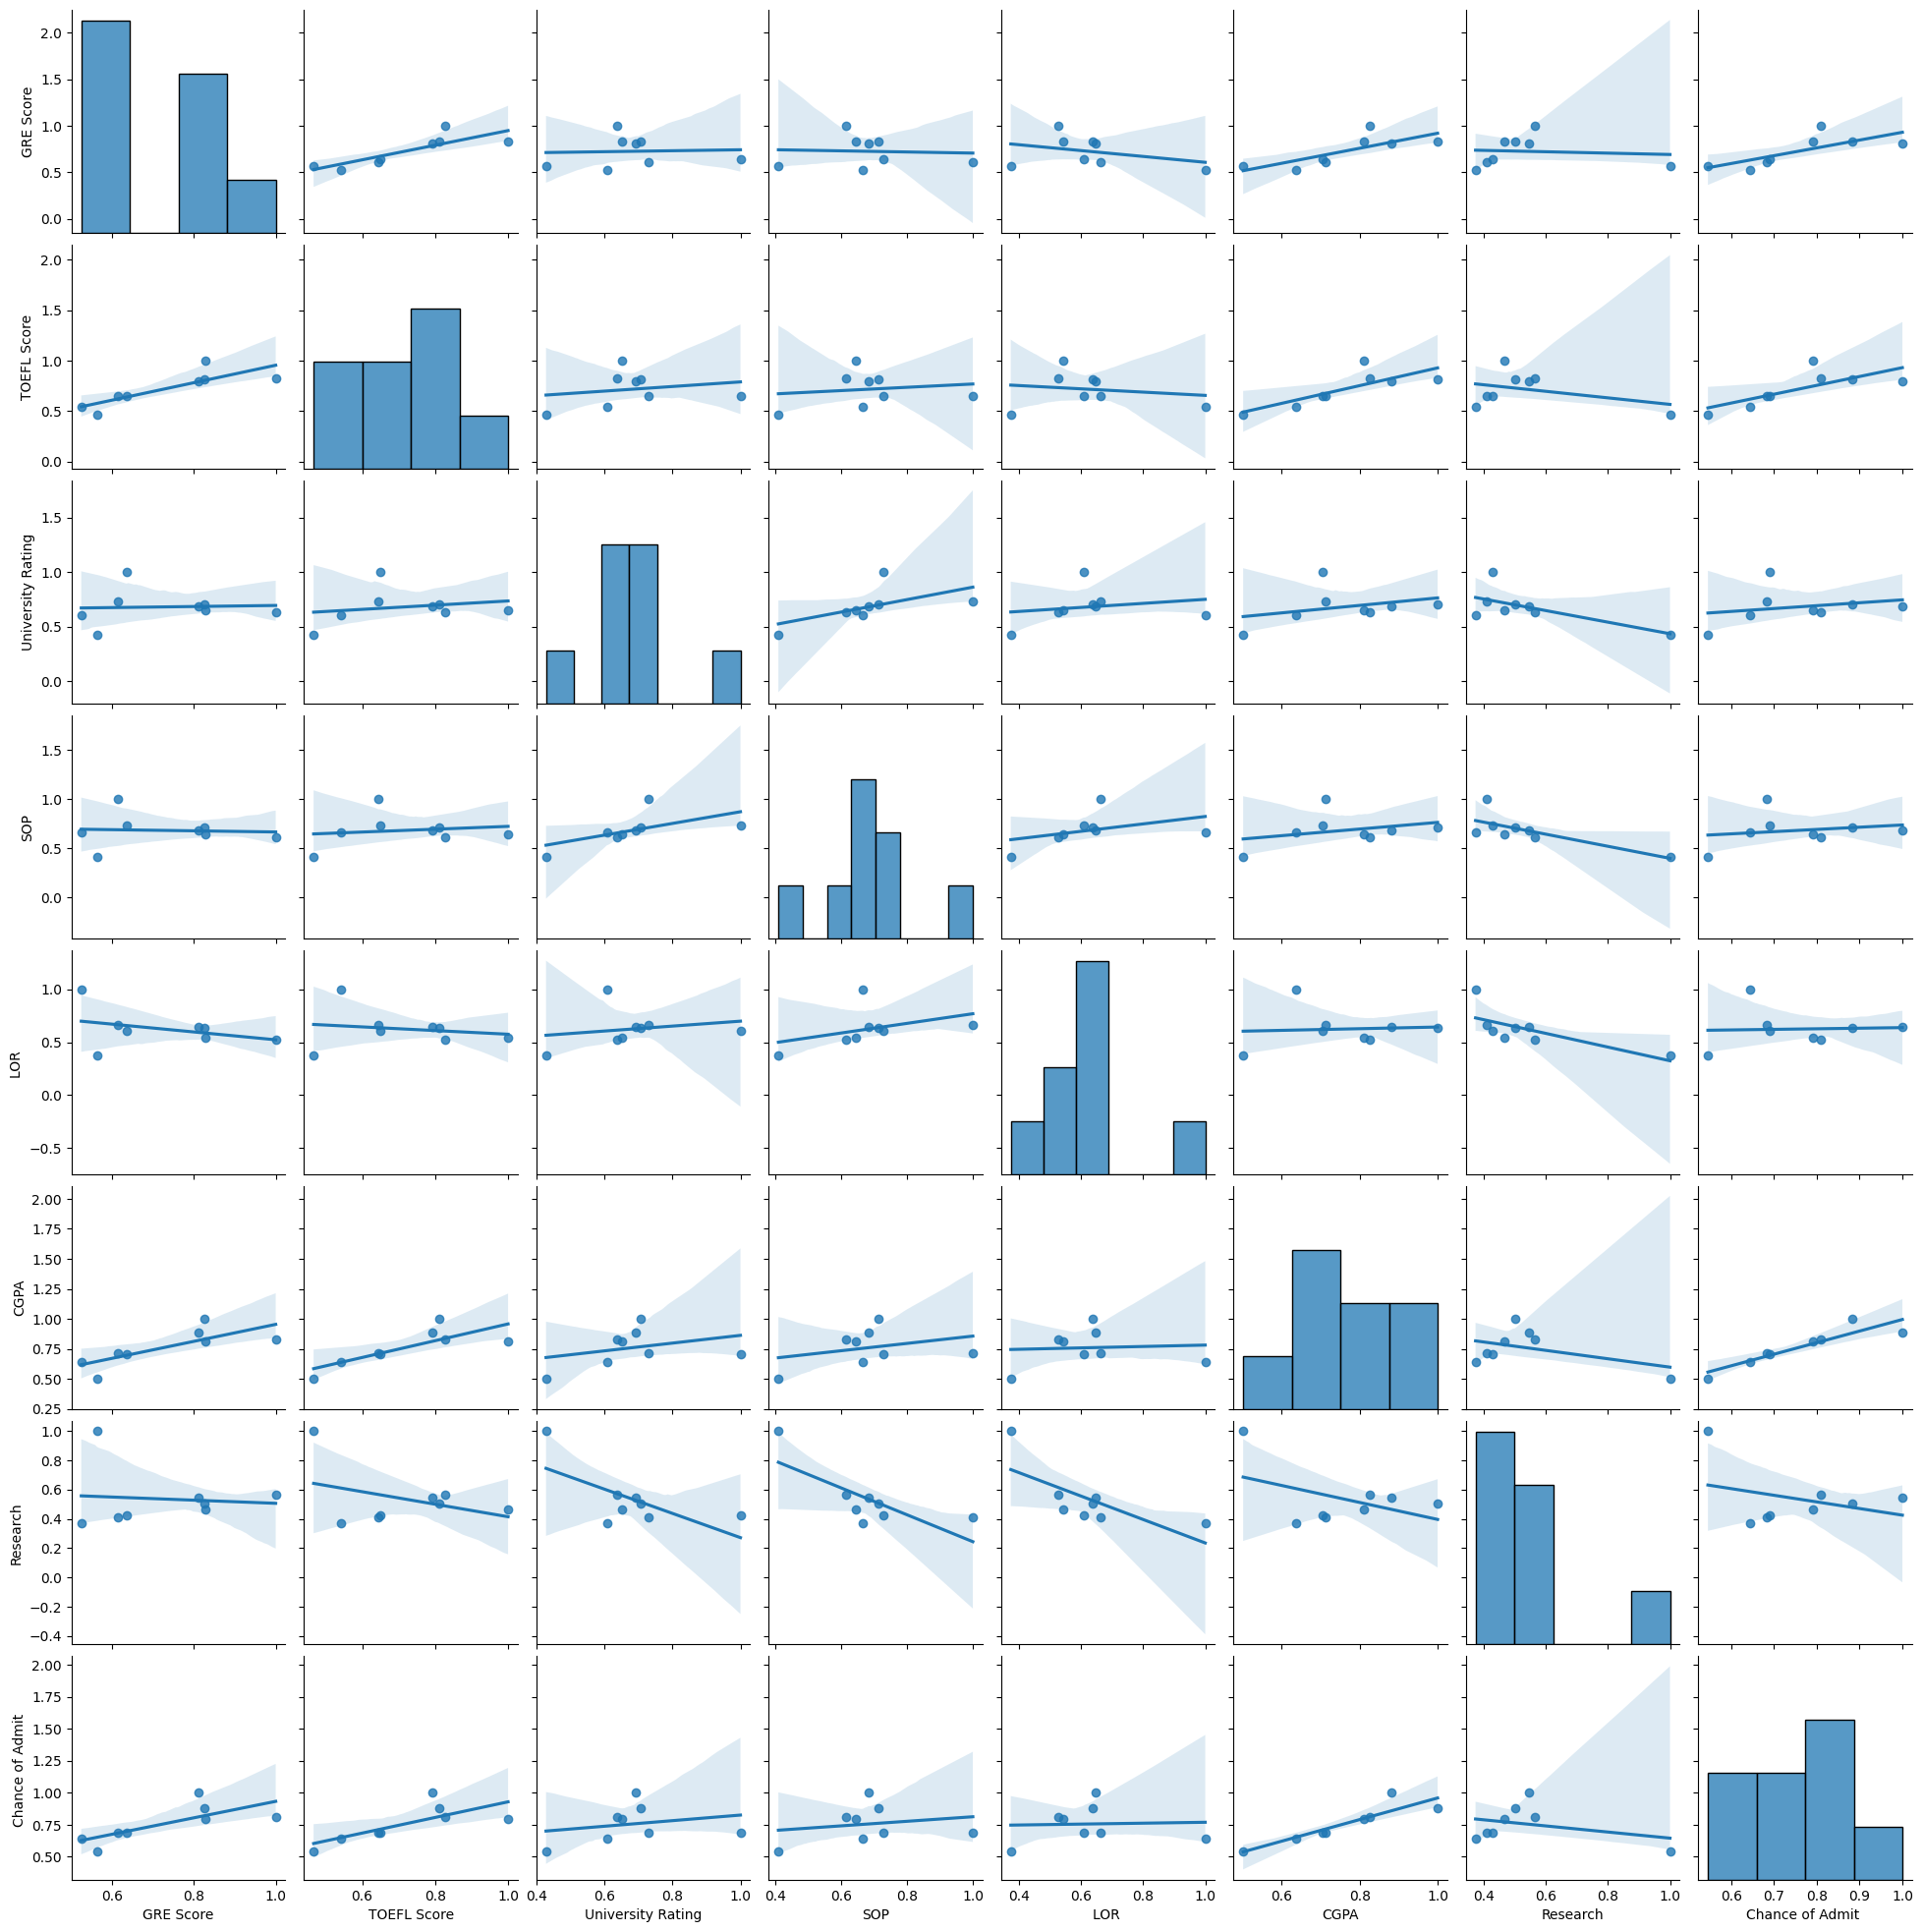

In [ ]:
# Check linearity and coorelation accross attributes
sns.pairplot(df.corr(),kind='reg')

<Axes: xlabel='Research', ylabel='count'>

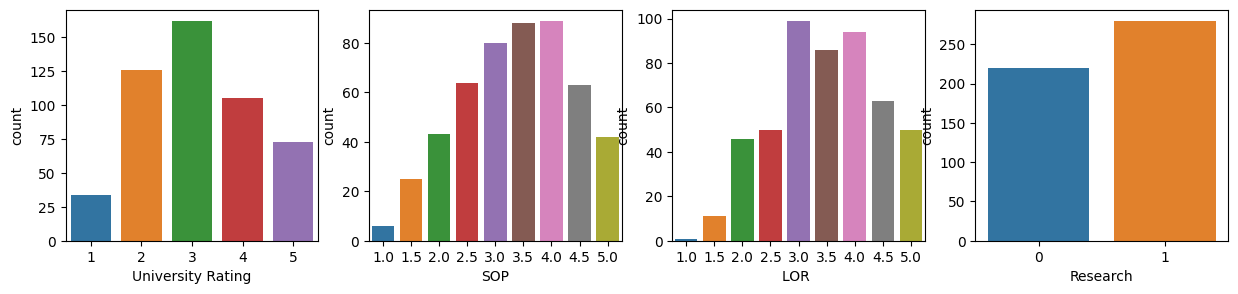

In [ ]:
# Graphical representation of categorical features

plt.figure(figsize=(15,3))
plt.subplot(1,4,1)
sns.countplot(x=df['University Rating'])

plt.subplot(1,4,2)
sns.countplot(x=df["SOP"])

plt.subplot(1,4,3)
sns.countplot(x=df['LOR '])

plt.subplot(1,4,4)
sns.countplot(x=df['Research'])

Data has majority rating at 3. Majority of students have letter of recommendation values as 3. SOP is hightest at 4

# Linear Regression

In [ ]:
X=df.drop(['Chance of Admit '],axis=1)
y=df['Chance of Admit '].values.reshape(-1,1)
y=y.ravel()

In [ ]:
df.duplicated().sum()

0

There are no duplicate values.

In [ ]:
# Standardize data
scaler= StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=1,test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((350, 7), (150, 7), (350,), (150,))

In [ ]:
def adjusted_r2(r2,p,n):
# r2= r2 score
# p= no.of predcitors
# n= no. of samples

  adj_r2= 1-((1-r2)*n-1)/(n-p-1)
  return adj_r2

def get_metrics(y_true,y_pred,p=None):
  n=y_true.shape[0]
  mse=np.sum((y_true-y_pred)**2)/n
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(y_true-y_pred))
  score=r2_score(y_true,y_pred)
  adj_r2=adjusted_r2(score,p,n)

  if p is not None:
    adj_r2=adjusted_r2(score,p,n)

  res=('mean_squared_error:', round(mse,2),
      'mean_absolute_error:',round(mae,2),
       'rmse:', round(rmse,2),
       'r2_score:', round(score,2),
       'adj_r2:', round(adj_r2,2))

  return res

In [ ]:
def train_model(X_train,y_train,X_test,y_test,cols,model_name='linear',alpha=1):
  model=None
  if model_name=='lasso':
    model=Lasso(alpha=alpha)
  elif model_name=='ridge':
    model=Ridge(alpha=alpha)
  else:
    model=LinearRegression()

  model.fit(X_train, y_train)
  y_pred_train=model.predict(X_train)
  y_pred_test=model.predict(X_test)
  p=X_train.shape[1]
  train_res=get_metrics(y_train,y_pred_train,p)
  test_res=get_metrics(y_test,y_pred_test,p)

  # print(model_name.title(),' Regression Model')
  # print('Train MAE:', train_res['mean_absolute_error'], 'Test MAE:', test_res['mean_absolute_error'])
  # print('Train RMSE:', train_res['rmse'], 'Test RMSE:', test_res['rmse'])
  # print('Train R2_Score:', train_res['r2_score'], 'Test R2_Score:', test_res['r2_score'])
  # print('Train Adjusted_R2:', train_res['adj_r2'], 'Test Adjusted_R2:', test_res['adj_r2'])
  # print('Intercept:', model.intercept_)

  print(model_name.title(),' Regression Model')
  print('Train MAE:', train_res[1], 'Test MAE:', test_res[1])
  print('Train RMSE:', train_res[3], 'Test RMSE:', test_res[3])
  print('Train R2_Score:', train_res[5], 'Test R2_Score:', test_res[5])
  print('Train Adjusted_R2:', train_res[7], 'Test Adjusted_R2:', test_res[7])
  print('Intercept:', model.intercept_)

  coef_df=pd.DataFrame({'Column': cols, 'Coef': model.coef_ })
  print(coef_df)
  print('-'*20)
  return model

In [ ]:
model= train_model(X_train,y_train,X_test,y_test,df.columns[:-1], "linear")
train_model(X_train,y_train,X_test,y_test,df.columns[:-1], 'ridge',0.001)
train_model(X_train,y_train,X_test,y_test,df.columns[:-1], 'lasso',0.001)


Linear  Regression Model
Train MAE: 0.0 Test MAE: 0.0
Train RMSE: 0.04 Test RMSE: 0.04
Train R2_Score: 0.06 Test R2_Score: 0.06
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.82
Intercept: 0.724978121476996
              Column      Coef
0          GRE Score  0.018657
1        TOEFL Score  0.023176
2  University Rating  0.011565
3                SOP -0.000999
4               LOR   0.012497
5               CGPA  0.064671
6           Research  0.013968
--------------------
Ridge  Regression Model
Train MAE: 0.0 Test MAE: 0.0
Train RMSE: 0.04 Test RMSE: 0.04
Train R2_Score: 0.06 Test R2_Score: 0.06
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.82
Intercept: 0.7249781257853902
              Column      Coef
0          GRE Score  0.018657
1        TOEFL Score  0.023176
2  University Rating  0.011565
3                SOP -0.000999
4               LOR   0.012497
5               CGPA  0.064670
6           Research  0.013968
--------------------
Lasso  Regression Model
Train MAE: 0.0 Test MAE: 0.0
T

Lasso(alpha=0.001)

The results of Linear, Ridge and Lasso regression methods exhibit same results. Both r2 score and sdjusted r2 score are also same indicating that the dataset lacks redundant independent variables.

# Assumption Test

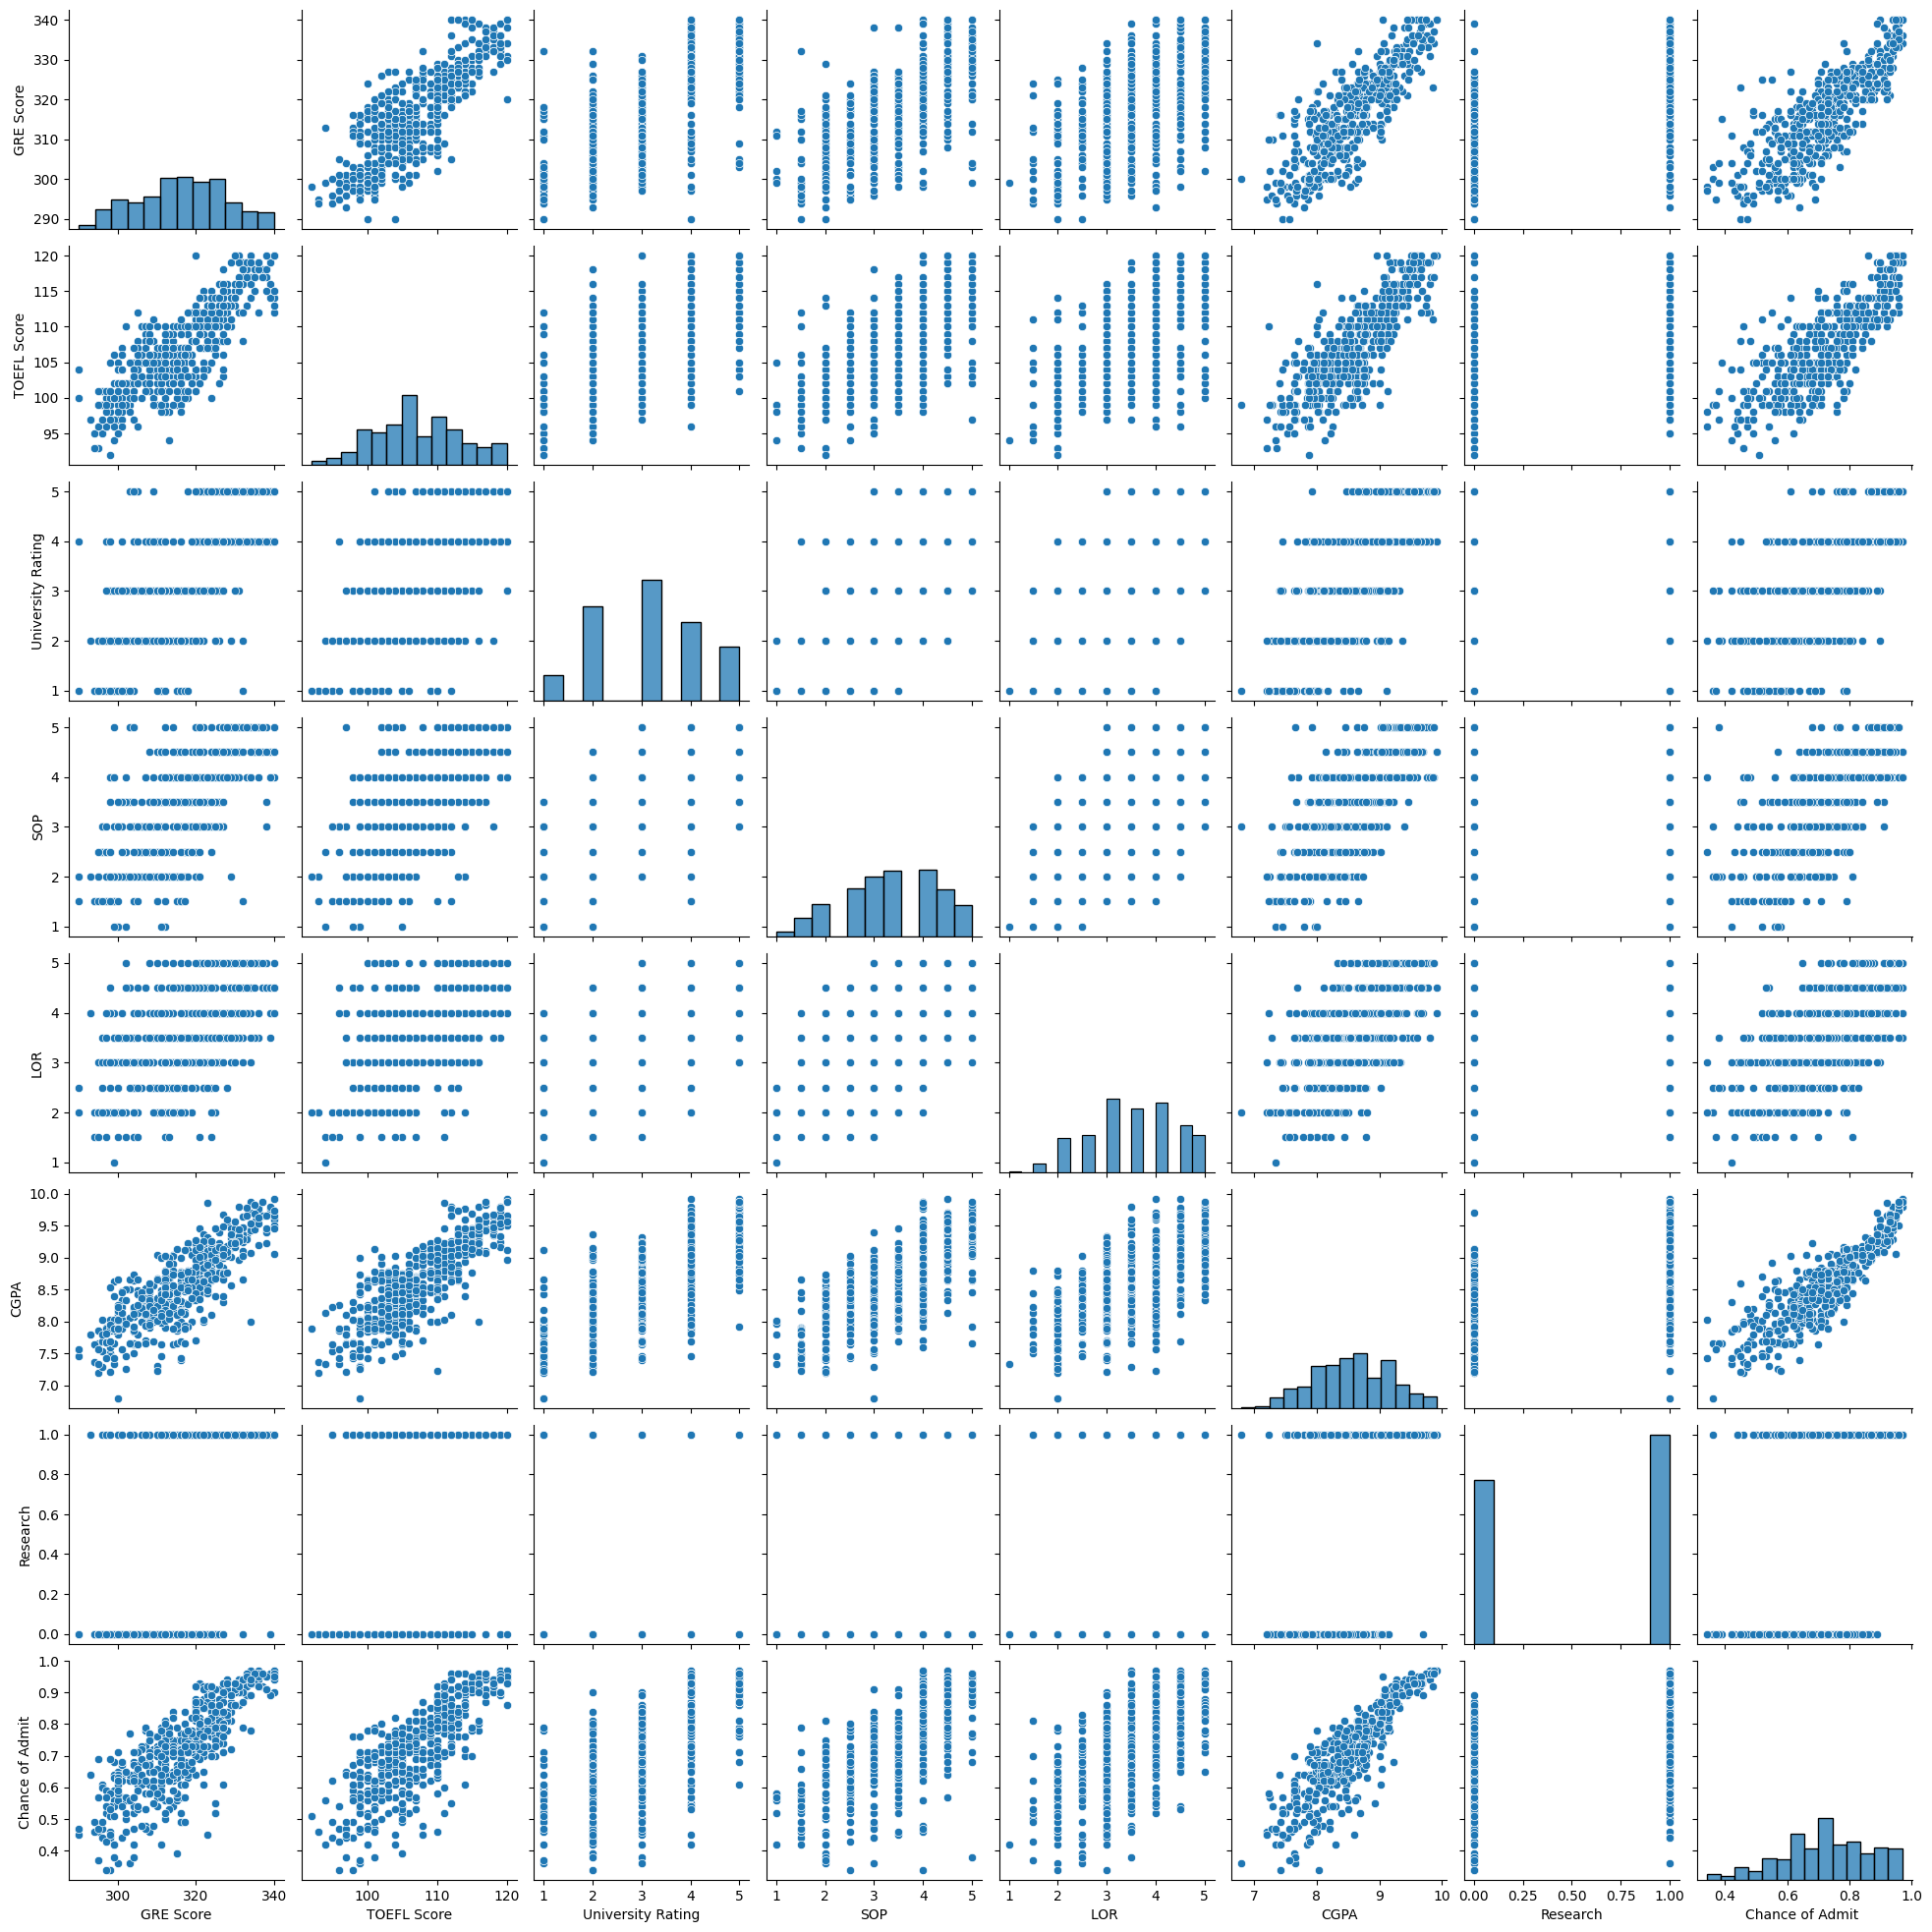

In [ ]:
# Linearity
sns.pairplot(df)

In [ ]:
# Multicollinearity Check
vif=[]
for i in range(X_train.shape[1]):
  vif.append((variance_inflation_factor(exog=X_train,exog_idx=i)))
print(vif)

[4.490091780795141, 4.149552498139756, 2.9934507897248457, 2.9624309902762738, 2.025621205075567, 4.634095119988949, 1.5283320169049055]


All vif values are less than 5. This indicates there is no multicollinearity in the data.

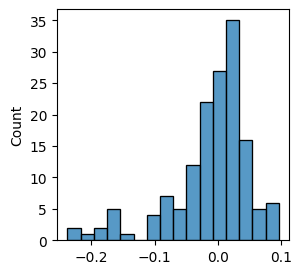

In [ ]:
# Normality of Residuals
plt.figure(figsize=(3,3))
y_predd=model.predict(X_test)
residuals=(y_test-y_predd)
sns.histplot(residuals)
plt.show()

In [ ]:
abs(residuals.mean())

0.010793738256654513

Here the mean of residuals is close to zero. This indicates that the models predictions are close to the actual datapoints.

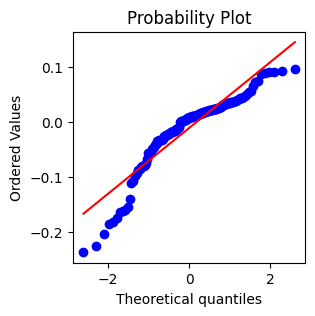

In [ ]:
plt.figure(figsize=(3,3))
stats.probplot(residuals, plot=plt)
plt.show()

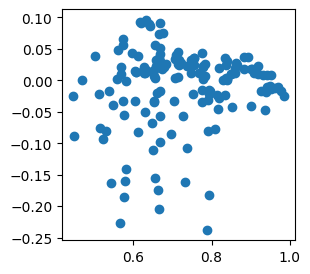

In [ ]:
# Test for Homoscedasticity
plt.figure(figsize=(3,3))
plt.scatter(y_predd,residuals)
plt.show()

The plot does not create a cone type shape which indicates the data is not homoscedasticity.

# Insights & Recommendations:



* There are 500 rows and 9 columns in the dataset. There are no null values, outlier values or duplicated vaules in the data.

* We can observe that University rating, SOP, LOR and Research seems to be a categorical variable as they have less number of unique values. GRE score, TOEFL score and CGPA are numerical variables. Chance to admit column is the target column for us.

* According to the correlation heatmap we can infere that GRE score, TOEFL score and CGPA are highly positively correlated to the chance of getting the admission where as other attributes like university rating, SOP, LOR and research are weakly correlated.

* Numerical varibles seems to be normally distributed as we can see in the histplot and qq plot.

* Data has majority rating at 3. Majority of students have letter of recommendation values as 3. SOP is hightest at 4.

* Our regression model shows that it predicts both the training and test data to a good extent. However, low r2(0.06) suggests that model explains only small part of data's variation.

* High adjusted r2(0.82) indicates pottential overfitting, where the model fits the training data too closely.

* From the linear regression assumption test, we can say that the data is linear. It does not have high multicollinearity. Residual mean is close to zero indicating majorly correct predictions. Also, the data has no Homoscedasticity.

* Institutes needs to focus not only on the scores but also on the letter of recommedation and statement of purpose to increase the change of the admission.

* Students can also work on the reseach part to build a strong profile and increase the chance of admission.